Announcements
1. Problem set 6 and quiz 6 due
2. Discussion board 2 and quiz 5 will be graded this weekend
3. How is the final project coming along?

Today's topic
1. What is linear regression?
2. Doing linear regression with linear algebra
3. Doing linear regression with sklearn

First, let's get our libraries. We are also getting a library called inv, which we will need for our calculation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv

Here, let's load our dataset that we feature engineered. 

In [2]:
data = pd.read_csv('final_mpg_dataset.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Type,chevrolet,nevs,nissan,peugeot,toyota,volkswagen,volvo,Sedan0,japan,usa,MediumHP,HighHP,HP_ordinal
0,18.0,8.0,307.000000,130.000000,3504.0,12.000000,70.0,usa,chevrolet,Sedan,1,0,0,0,0,0,0,0,0,1,0,1,3
1,14.0,8.0,167.405634,92.497143,4354.0,16.007471,70.0,usa,chevrolet,Sedan,1,0,0,0,0,0,0,0,0,1,0,1,3
2,15.0,8.0,400.000000,150.000000,3761.0,16.007471,70.0,usa,chevrolet,Sedan,1,0,0,0,0,0,0,0,0,1,0,1,3
3,24.0,4.0,113.000000,95.000000,2372.0,15.000000,70.0,japan,toyota,Coupe,0,0,0,0,1,0,0,1,1,0,1,0,2
4,26.0,4.0,12.000000,46.000000,1835.0,20.500000,70.0,europe,volkswagen,Coupe,0,0,0,0,0,1,0,1,0,0,0,0,1


I think a good relationship to investigate first is horsepower against weight

Based on how the data looks, it looks like there is a strong positive relationship. As horsepower increases, so does weight 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


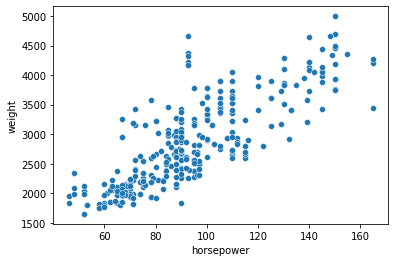

In [3]:
sns.scatterplot(data['horsepower'],data['weight'])

Now, let's rearrange the data a little bit. To do our calculation using linear algebra, we will turn out horsepower series into an array that is n by 1, with n being the number of observations

In [4]:
X = np.array(data['horsepower'])
X = X.reshape((len(X), 1))
X.shape

(358, 1)

And for the thing we want to predict or explain, we will create an array. Note that y should be 1-dimensional. It should just be size n. Not n by 1

In [5]:
y = np.array(data['weight'])
y.shape

(358,)

Now, here is the equation we will use.

Its a bit complicated. Its simply a rearranging of the variables in the equation "yi = bxi" (which is the samea s y = mx), whereby we are solving for b (our betas)


In [6]:
b = inv(X.T.dot(X)).dot(X.T).dot(y)

The beta that comes out tells us the slope of the line.

In [7]:
print(b)

[30.00934642]


So, our equation is 

y = 30.009 * x

or 

weight = 30.009 * horsepower

We can then find the predicted y values by multiplying our X values by the return beta

Note that it is using this dot multiplication, since X is a matrix

If we printed the output, these are the corresponding y values from that equation

In [ ]:
yhat = X.dot(b)
print(yhat)

We can plot these y values and see that it forms a line

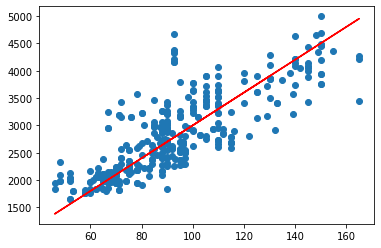

In [9]:
plt.scatter(X, y)
plt.plot(X, yhat, color='red')

Super cool!

But, something is missing from our regression.

What do you think it is?

It may be obvious in hindsight, but we didn't account for the intercept.

(0.0, 170.0)

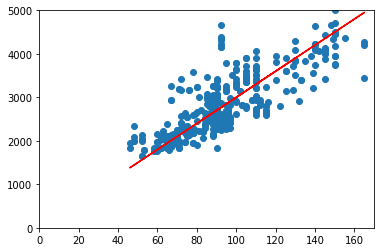

In [10]:
plt.scatter(X, y)
plt.plot(X, yhat, color='red')
plt.ylim([0,5000])
plt.xlim([0,170])

If you zoom out, you will see that the line will pass right through 0,0. 

Maybe the y-intercept will be pretty helpful, so let's add it 

To do so, we basically add a column of 1s to our X matrix. This is like adding a constant to our X values

In [11]:
b0 = np.ones((len(X), 1))

Now, we can concatenate with our original data to form this new n by 2 matrix

In [ ]:
X2 = np.concatenate((b0,X),axis=1)
print(X2,X2.shape)

We can now actually pass this new X2 directly into the formula we used before

In [13]:
b_2 = inv(X2.T.dot(X2)).dot(X2.T).dot(y)
print(b_2)

[625.80410928  23.71789311]


Now, we have two betas! These refer to b0 and b1, which b0 being y-intercept and b1 being the parameter for our horsepower

Our equation is now:

weight = 625.804 + 23.717*horsepower

Let's find our new predicted y values based on the new betas

In [14]:
yhat2 = X2.dot(b_2)

and now, let's look at the plot

(0.0, 170.0)

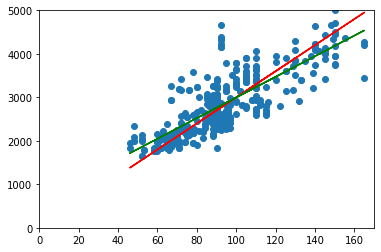

In [15]:
plt.scatter(X, y)
plt.plot(X, yhat, color='red')
plt.plot(X, yhat2, color='green')
plt.ylim([0,5000])
plt.xlim([0,170])

Now, this is awesome we can do this with math. And its basically just one line of code. But this isn't exactly the best approach.

Instead, we can utilize existing libraries. One such library comes from sklearn

In [16]:
from sklearn.linear_model import LinearRegression

Like we discussed, sklearn works by first defining the model

Here, we also establish the hyperparameters. Different models will have different hyperparameters. For our linear regression, we will only ensure that the intercept is True (note: this is default, but its nice to have it visible, so we don't have to worry about it)

In [17]:
model = LinearRegression(fit_intercept=True)

The next step is doing the actual fitting, the learning, if you will. We will pass in our X and y from before. Note that we do not need to have that extra column of 1s here because we have told it to include an intercept

In [18]:
model.fit(X,y) # convention is X and y

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

and.... that it is

Cool

We can check out the coeffecient

In [19]:
model.coef_ # SLOPE of the model

array([23.71789311])

And the intercept

In [20]:
model.intercept_ # INTERCEPT of the model

625.8041092779536

So, according to sklearn, our equation is:

weight = 625.804 + 23.717*horsepower

This is basically the same from what we found with our linear algebra! Awesome!

We can get our predicted y values from our x values by using the predict method

In [21]:
yfit = model.predict(X)

Now let's make a plot

(0.0, 5000.0)

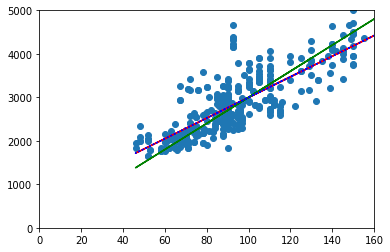

In [22]:
plt.scatter(X,y)
plt.plot(X,yfit,c='r')
plt.plot(X, yhat, color='g')
plt.plot(X, yhat2, color='b',linestyle=':')
plt.xlim([0,160])
plt.ylim([0,5000])

We can look at the residuals to get a feel for how good the predictions are

The residuals are the difference between the predicted y values and the actual y values.

As you would expect, if the residuals = 0, then we did a perfect job of fitting the data. The further away the residuals are from 0, then the worse our prediction was

(array([  3.,  28.,  95., 103.,  73.,  27.,  19.,   3.,   5.,   2.]),
 array([-1094.2564725 ,  -799.99497091,  -505.73346931,  -211.47196772,
           82.78953387,   377.05103546,   671.31253705,   965.57403864,
         1259.83554023,  1554.09704183,  1848.35854342]),
 <a list of 10 Patch objects>)

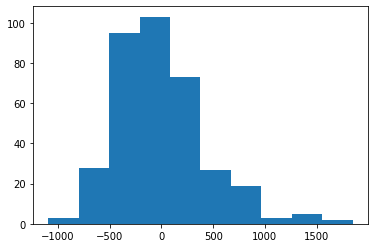

In [23]:
plt.hist(y-yfit)

In my experience, residuals are best compared between models

(-2000.0, 2000.0)

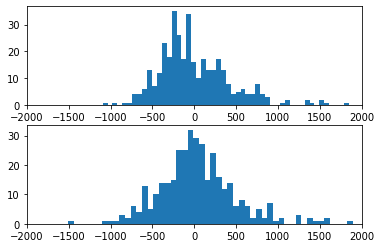

In [30]:
plt.subplot(2,1,1)
plt.hist(y-yfit,50) # model fit with sklearn and with an intercept
plt.xlim([-2000,2000])
plt.subplot(2,1,2)
plt.hist(y-yhat,50)  # model fit with math and without an intercept
plt.xlim([-2000,2000])

There isn't a whole lot of difference in the residuals between the model with the intercept and without the intercept in this case. It actually makes sense when we look at the plots above and see that the two lines are quite similar

a residual plot is the histgram plotted against the predicted values. Here, we can get a slightly better idea of the model. If we see a pattern here, for example, a wavy "line", then it suggests that our data is not really linear. Seeing a cloud (like below) is a good thing

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


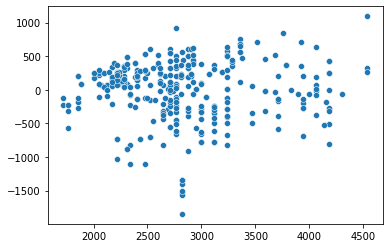

In [ ]:
sns.scatterplot(yfit,yfit-y)

numerically, we can check out the R2 value, which quantifies the fit 

R2 is basically how much better our line is compared to a line that is completely horizontal. 

It is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

The closer to 1 R2 is, the better our fit of the data

In [ ]:
model.score(X,y) # Return the coefficient of determination R^2 of the prediction

0.6596223228824938

Next class, we will talk about how to do this process in machine learning, since nothing here is actually machine learning (everything above is about fitting). And, we will talk about fitting multiple predictors, since that is what we will eventually want to do